<a href="https://colab.research.google.com/github/Sheriii11/555/blob/main/fa2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow_decision_forests

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 56.3 MB/s eta 0:00:00


**Import  Libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
import tensorflow as tf
import tensorflow_decision_forests as tfdf

**Load the necessary csv files**

In [ ]:
# Upload the training data
uploaded_TR = files.upload()
# Load the training data
train_data = pd.read_csv("train.csv")

Saving train.csv to train (1).csv


In [ ]:
# Upload the test data
uploaded_TS = files.upload()
# Load the test data
test_data = pd.read_csv("test.csv")

Saving test.csv to test (1).csv


**Basic information**

In [ ]:
train_data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
train_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


**Bar chart of transported column**

<Axes: >

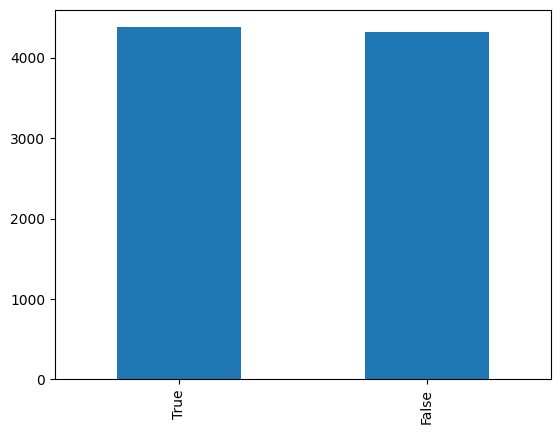

In [ ]:
# Display the bar chart of the target variable 'Transported'
plot_train = train_data.Transported.value_counts()
plot_train.plot(kind="bar")

**Data Distribution for Numerical Values**

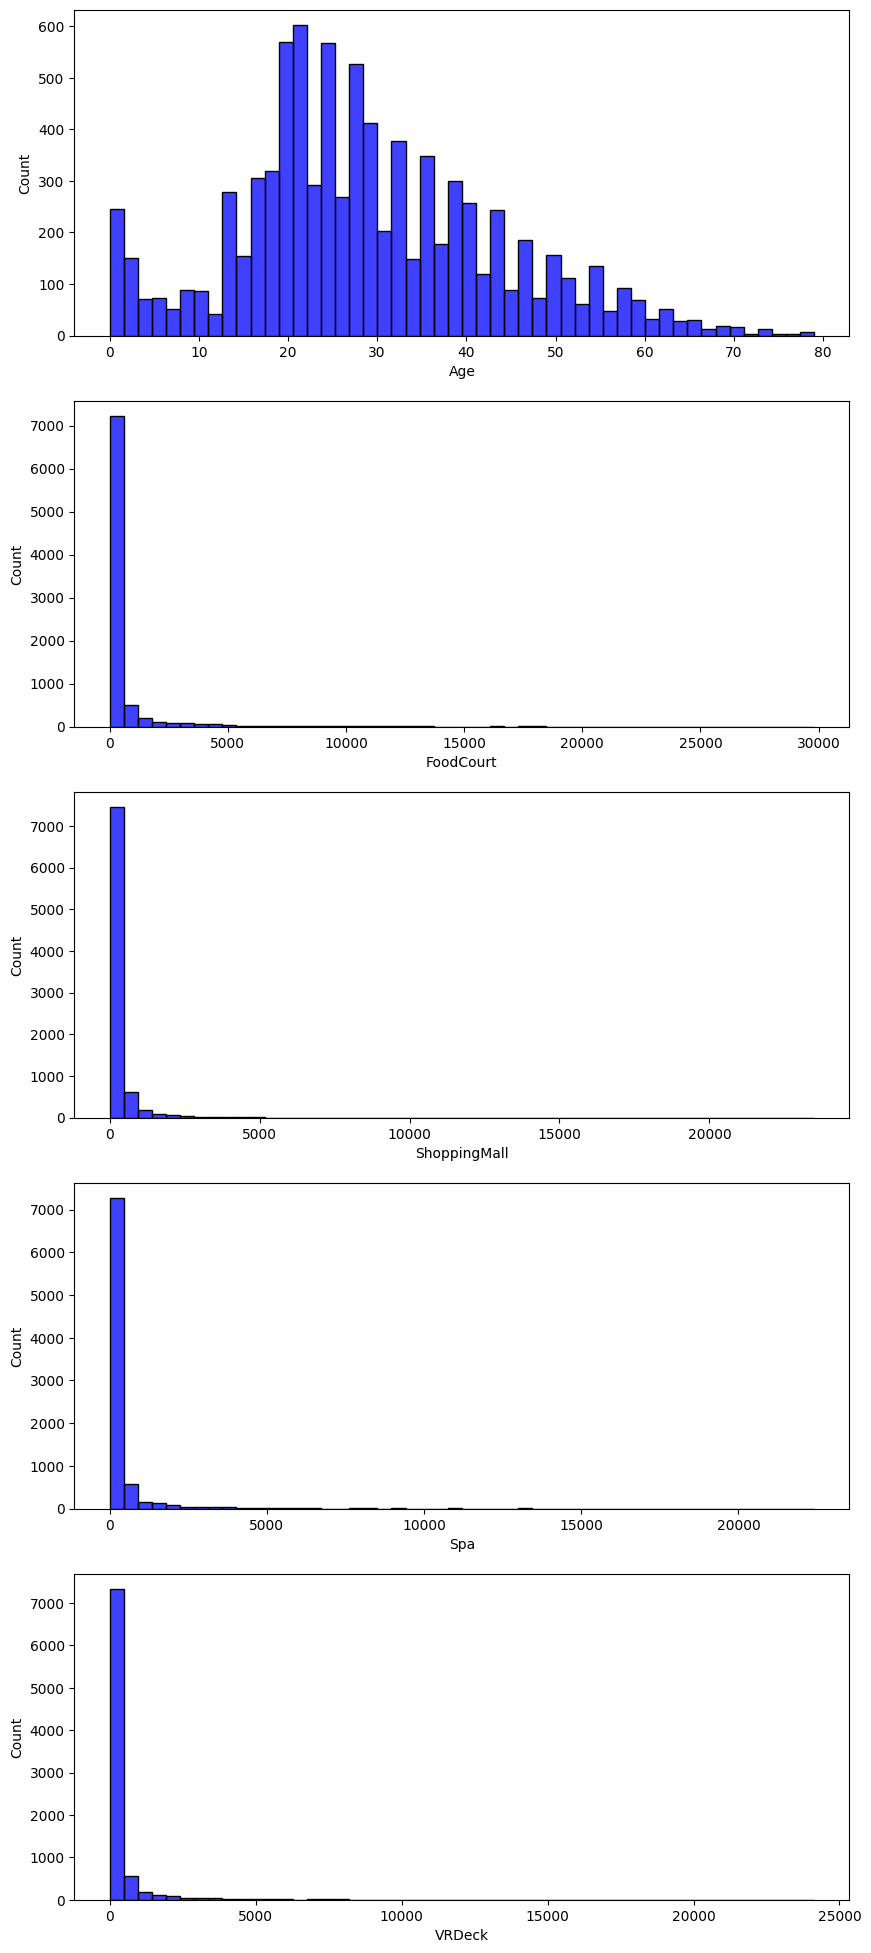

In [ ]:
fig, ax = plt.subplots(5,1,  figsize=(10, 10))
plt.subplots_adjust(top = 2)

sns.histplot(train_data['Age'], color='b', bins=50, ax=ax[0]);
sns.histplot(train_data['FoodCourt'], color='b', bins=50, ax=ax[1]);
sns.histplot(train_data['ShoppingMall'], color='b', bins=50, ax=ax[2]);
sns.histplot(train_data['Spa'], color='b', bins=50, ax=ax[3]);
sns.histplot(train_data['VRDeck'], color='b', bins=50, ax=ax[4]);

**Preprocessing**

In [ ]:
train_data = train_data.drop(['PassengerId', 'Name'], axis=1)
train_data.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
5,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,True
6,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,True
7,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,True
8,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,True
9,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,True


**Checking For Missing Values**

In [ ]:
print("Train data information: ")
print(train_data.info())

Train data information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(5)
memory usage: 755.7+ KB
None




>**Tthe total null count of many columns is less than the total number of entries which means that we may need to handle missing values.**


In [ ]:
train_data.isnull().sum().sort_values(ascending=False)

CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
Transported       0
dtype: int64

**Dataset Characteristics:**
* The dataset exhibits a diverse range of features, encompassing numeric, categorical, and instances of missing data. Notably, TensorFlow Decision Forests (TF-DF) seamlessly accommodates these varying data types, eliminating the need for extensive preprocessing steps.

**Handling Boolean Fields with Missing Values:**

* A unique scenario arises as the dataset comprises boolean fields with missing values. TF-DF currently lacks direct support for boolean fields. To navigate this limitation, a workaround involves transforming these boolean fields into integer format. This conversion translates boolean values to 0 (representing False) and 1 (indicating True), ensuring compatibility with TF-DF.

**Addressing Missing Values in Boolean Fields:**

* It's essential to note that the boolean fields also present missing values. To align with TF-DF requirements, these missing boolean values will be substituted with zeros. This strategic replacement ensures that TF-DF interprets missing boolean values as False during the model training process.

**Treatment of Missing Values in Numerical Columns:**

* As part of this approach, missing values in numerical columns will be replaced with zeros. This streamlined strategy simplifies the management of missing numerical data, complementing the decision to convert boolean fields to integers. Moreover, it allows TF-DF to seamlessly handle missing values specifically in categorical columns.

In [ ]:
train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']] = train_data[['VIP', 'CryoSleep', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].fillna(value=0)
train_data.isnull().sum().sort_values(ascending=False)

HomePlanet      201
Cabin           199
Destination     182
RoomService     181
Age             179
CryoSleep         0
VIP               0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Transported       0
dtype: int64

In [ ]:
# convert boolean columns to int format
train_data["Transported"] = train_data["Transported"].astype(int)
train_data['VIP'] = train_data['VIP'].astype(int)
train_data['CryoSleep'] = train_data['CryoSleep'].astype(int)

**Splitting the Cabines into 3 parts (deck,num,side)**

In [ ]:
try:
    # Extracting information from 'Cabin' and creating new columns
    train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)
    # Remove original Cabin column from the dataset
    train_data = train_data.drop('Cabin', axis=1)
except KeyError:
    print("ERROR: Field does not exist")

ERROR: Field does not exist


**Final Preprocessed Data**

In [ ]:
train_data.head(10)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0,B,0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1,F,0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,A,0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,A,0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1,F,1,S
5,Earth,0,PSO J318.5-22,44.0,0,0.0,483.0,0.0,291.0,0.0,1,F,0,P
6,Earth,0,TRAPPIST-1e,26.0,0,42.0,1539.0,3.0,0.0,0.0,1,F,2,S
7,Earth,1,TRAPPIST-1e,28.0,0,0.0,0.0,0.0,0.0,0.0,1,G,0,S
8,Earth,0,TRAPPIST-1e,35.0,0,0.0,785.0,17.0,216.0,0.0,1,F,3,S
9,Europa,1,55 Cancri e,14.0,0,0.0,0.0,0.0,0.0,0.0,1,B,1,P


from matplotlib import pyplot as plt
_df_0['CryoSleep'].plot(kind='hist', bins=20, title='CryoSleep')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['VIP'].plot(kind='hist', bins=20, title='VIP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['RoomService'].plot(kind='hist', bins=20, title='RoomService')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('HomePlanet').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('Destination').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('Deck').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('Cabin_num').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='CryoSleep', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='Age', y='VIP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='VIP', y='RoomService', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='RoomService', y='FoodCourt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['CryoSleep'].plot(kind='line', figsize=(8, 4), title='CryoSleep')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['VIP'].plot(kind='line', figsize=(8, 4), title='VIP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['RoomService'].plot(kind='line', figsize=(8, 4), title='RoomService')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Destination'].value_counts()
    for x_label, grp in _df_16.groupby('HomePlanet')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('HomePlanet')
_ = plt.ylabel('Destination')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Deck'].value_counts()
    for x_label, grp in _df_17.groupby('Destination')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Destination')
_ = plt.ylabel('Deck')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Cabin_num'].value_counts()
    for x_label, grp in _df_18.groupby('Deck')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Deck')
_ = plt.ylabel('Cabin_num')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Side'].value_counts()
    for x_label, grp in _df_19.groupby('Cabin_num')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Cabin_num')
_ = plt.ylabel('Side')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['HomePlanet'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='CryoSleep', y='HomePlanet', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['Destination'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='CryoSleep', y='Destination', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['Deck'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='CryoSleep', y='Deck', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['Cabin_num'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='CryoSleep', y='Cabin_num', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Splitting DataSet 80 by 20 Ratio**

In [ ]:
def split_dataset(dataset, test_ratio=0.20):
  test_indices = np.random.rand(len(dataset)) < test_ratio
  return dataset[~test_indices], dataset[test_indices]

train_ds_pd, valid_ds_pd = split_dataset(train_data)
print("{} examples in training, {} examples in testing.".format(
    len(train_ds_pd), len(valid_ds_pd)))

6974 examples in training, 1719 examples in testing.


In [ ]:
# convert the datatset from Pandas format (pd.DataFrame) into TensorFlow Datasets format (tf.data.Dataset).
label= 'Transported'
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train_ds_pd, label=label)
valid_ds = tfdf.keras.pd_dataframe_to_tf_dataset(valid_ds_pd, label=label)

A Random Forest constitutes an ensemble learning technique that incorporates numerous decision trees. These trees undergo independent training on randomly selected subsets of the training dataset, enabling them to capture diverse patterns within the data. This ensemble methodology serves to enhance the model's robustness and mitigate the risk of overfitting. TensorFlow Decision Forests streamlines the user experience by offering default hyperparameters derived from effective benchmarks, ensuring reliable performance. Users retain the flexibility to fine-tune the learning algorithm through diverse configuration options, allowing for optimization of accuracy.

**Create Random Forest**

In [ ]:
rf = tfdf.keras.RandomForestModel()
rf.compile(metrics=["accuracy"])

Use /tmp/tmp6ucv5o9t as temporary training directory


**Train the Model**

In [ ]:
rf.fit(x=train_ds)

Reading training dataset...
Training dataset read in 0:00:05.165050. Found 6974 examples.
Training model...
Model trained in 0:01:57.800785
Compiling model...
Model compiled.


**Visualizing the model**

In [ ]:
tfdf.model_plotter.plot_model_in_colab(rf, tree_idx=0, max_depth=3)



**Out-of-Bag (OOB) Score:**

Throughout the Random Forest Model training, individual decision trees undergo training on randomly chosen subsets of the training set (with replacement). The untouched samples, excluded from each training subset, constitute the Out-of-Bag (OOB) data. The OOB score is determined by evaluating the model's predictions on this reserved data subset. This serves as an additional gauge of the model's performance, acting as a validation metric without requiring a distinct validation set.

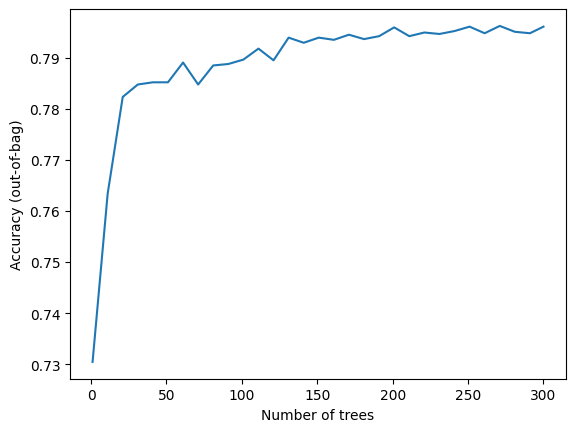

In [ ]:
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.accuracy for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("Accuracy (out-of-bag)")
plt.show()

In [ ]:
# General stats on the OOB dataset
inspector = rf.make_inspector()
inspector.evaluation()

Evaluation(num_examples=6974, accuracy=0.7960997992543734, loss=0.5431350311097468, rmse=None, ndcg=None, aucs=None, auuc=None, qini=None)

**Model Evaluation**

In [ ]:
evaluation = rf.evaluate(x=valid_ds,return_dict=True)

for name, value in evaluation.items():
  print(f"{name}: {value:.4f}")

2/2 [==============================] - 1s 78ms/step - loss: 0.0000e+00 - accuracy: 0.8016
loss: 0.0000
accuracy: 0.8016


**Feature Importance Evaluation:**

Feature importance analysis is crucial for understanding the significance of each feature in influencing a model's predictions. In TensorFlow Decision Forests, there exist multiple techniques to discern these important features. The example highlights the Variable Importance `NUM_AS_ROOT`, indicating the frequency with which a feature serves as the root node in decision trees. A higher importance score for this feature signifies a more substantial impact on the model's outcomes. The default sorting of the list reveals features arranged from most to least important. This valuable information aids in comprehending which features are frequently chosen as the initial points for decision trees in the random forest, providing key insights into their role in shaping model predictions.

In [ ]:
print(f"Available variable importances:")
for importance in inspector.variable_importances().keys():
  print("\t", importance)

Available variable importances:
	 SUM_SCORE
	 INV_MEAN_MIN_DEPTH
	 NUM_AS_ROOT
	 NUM_NODES


In [ ]:
inspector.variable_importances()["NUM_AS_ROOT"]

[("CryoSleep" (1; #2), 119.0),
 ("RoomService" (1; #7), 67.0),
 ("Spa" (1; #10), 53.0),
 ("VRDeck" (1; #12), 33.0),
 ("ShoppingMall" (1; #8), 15.0),
 ("FoodCourt" (1; #5), 9.0),
 ("Deck" (4; #3), 3.0),
 ("HomePlanet" (4; #6), 1.0)]

**Submission**

In [ ]:
submission_id = test_data.PassengerId

# Replace NaN values with zero
test_data[['VIP', 'CryoSleep']] = test_data[['VIP', 'CryoSleep']].fillna(value=0)

In [ ]:
# Creating New Features - Deck, Cabin_num and Side from the column Cabin and remove Cabin
test_data[["Deck", "Cabin_num", "Side"]] = test_data["Cabin"].str.split("/", expand=True)
test_data = test_data.drop('Cabin', axis=1)

# Convert boolean to 1's and 0's
test_data['VIP'] = test_data['VIP'].astype(int)
test_data['CryoSleep'] = test_data['CryoSleep'].astype(int)


In [ ]:
# Convert pd dataframe to tf dataset
test_data = tfdf.keras.pd_dataframe_to_tf_dataset(test_data)

# Get the predictions for testdata
predictions = rf.predict(test_data)
n_predictions = (predictions > 0.5).astype(bool)
output = pd.DataFrame({'PassengerId': submission_id,
                       'Transported': n_predictions.squeeze()})

output.head()

5/5 [==============================] - 1s 77ms/step


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


from matplotlib import pyplot as plt
import seaborn as sns
_df_24.groupby('PassengerId').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_25.groupby('Transported').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Transported'].value_counts()
    for x_label, grp in _df_26.groupby('PassengerId')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PassengerId')
_ = plt.ylabel('Transported')

In [ ]:
uploaded_sub = files.upload()
# Load the submission file
sub_data = pd.read_csv("sample_submission.csv")

Saving sample_submission.csv to sample_submission.csv


In [ ]:
sub_data['Transported'] = n_predictions
sub_data.to_csv('submission.csv', index=False)
sub_data.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True


from matplotlib import pyplot as plt
import seaborn as sns
_df_27.groupby('PassengerId').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_28.groupby('Transported').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Transported'].value_counts()
    for x_label, grp in _df_29.groupby('PassengerId')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('PassengerId')
_ = plt.ylabel('Transported')